In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

In [2]:
traj_s=[
    124.834,124.834,124.834,124.835,124.836,124.838,124.84,124.843,124.847,124.852,124.858,124.865,124.874,124.883,124.895,124.907,124.922,124.938,124.955,124.975,124.996,125.02,125.045,125.073,125.103,125.135,125.169,125.206,125.246,125.287,125.332,125.379,125.429,125.481,125.536,125.595,125.656,125.72,125.786,125.856,125.93,126.006,126.085,126.167,126.253,126.342,126.434,126.53,126.629,126.731,126.837,126.946,127.059,127.175,127.294,127.417,127.544,127.674,127.807,127.945,128.086,128.23,128.378,128.53,128.685,128.844,129.006,129.173,129.342,129.516,129.693,129.874,130.058,130.246,130.438,130.633,130.832,131.035,131.241,131.451,131.664,131.881,132.101,132.325,132.553,132.784,133.018,133.256,133.498,133.743,133.991,134.243,134.498,134.757,135.019,135.284,135.552,135.824,136.099,136.377,136.658,136.943,137.231,137.521,137.815,138.112,138.412,138.715,139.02,139.329,139.64,139.955,140.272,140.592,140.914,141.24,141.568,141.898,142.232,142.567,142.905,143.246,143.589,143.935,144.282,144.633,144.985,145.339,145.696,146.055,146.416,146.779,147.144,147.511,147.88,148.251,148.623,148.998,149.374,149.751,150.131,150.512,150.895,151.279,151.664,152.052,152.44,152.83,153.221,153.613,154.007,154.401,154.797,155.194,155.592,155.991,156.391,156.792,157.193,157.596,157.999,158.403,158.807,159.212,159.618,160.025,160.431,160.839,161.247,161.655,162.063,162.472,162.881,163.29,163.7,164.109,164.519,164.929,165.338,165.748,166.158,166.567,166.977,167.386,167.795,168.204,168.613,169.021,169.43,169.837,170.245,170.651,171.058,171.464,171.869,172.274,172.679,173.082,173.486,173.888,174.29,174.691,175.092,175.491,175.89,176.289,176.686,177.083,177.478,177.873,178.267,178.661,179.053,179.444,179.835,180.224,180.613,181.001,181.387,181.773,182.158,182.542,182.925,183.306,183.687,184.067,184.446,184.824,185.201,185.577,185.952,186.326,186.7,187.072,187.443,187.813,188.183,188.552,188.919,189.286,189.652,190.017,190.382,190.746,191.109,191.471,191.832,192.193,192.553,192.913,193.272,193.631,193.989,194.346,194.703,195.06,195.416,195.773,196.129,196.484,196.84,197.195,197.551,197.906,198.262,198.617,198.973,199.329,199.685,200.042,200.399,200.757,201.115,201.474
]
traj_d=[
     6.16483,6.16483,6.16483,6.16483,6.16482,6.16482,6.16481,6.16479,6.16478,6.16476,6.16473,6.1647,6.16467,6.16463,6.16459,6.16454,6.16448,6.16441,6.16434,6.16427,6.16418,6.16409,6.16399,6.16388,6.16376,6.16363,6.16349,6.16335,6.16319,6.16303,6.16285,6.16267,6.16247,6.16227,6.16205,6.16182,6.16158,6.16134,6.16107,6.1608,6.16052,6.16022,6.15992,6.1596,6.15927,6.15892,6.15857,6.1582,6.15782,6.15743,6.15703,6.15661,6.15618,6.15574,6.15529,6.15482,6.15434,6.15385,6.15334,6.15283,6.1523,6.15176,6.1512,6.15063,6.15005,6.14946,6.14886,6.14824,6.14761,6.14697,6.14632,6.14565,6.14497,6.14428,6.14358,6.14287,6.14214,6.14141,6.14066,6.1399,6.13913,6.13835,6.13755,6.13675,6.13594,6.13511,6.13427,6.13343,6.13257,6.1317,6.13083,6.12994,6.12905,6.12814,6.12723,6.1263,6.12537,6.12443,6.12348,6.12252,6.12155,6.12058,6.11959,6.1186,6.1176,6.1166,6.11559,6.11457,6.11354,6.11251,6.11147,6.11042,6.10937,6.10832,6.10726,6.10619,6.10512,6.10404,6.10296,6.10187,6.10078,6.09969,6.09859,6.09749,6.09639,6.09528,6.09417,6.09306,6.09195,6.09083,6.08971,6.08859,6.08747,6.08635,6.08523,6.0841,6.08298,6.08185,6.08073,6.07961,6.07848,6.07736,6.07624,6.07512,6.074,6.07289,6.07177,6.07066,6.06955,6.06845,6.06734,6.06624,6.06514,6.06405,6.06296,6.06187,6.06079,6.05972,6.05864,6.05758,6.05652,6.05546,6.05441,6.05336,6.05232,6.05129,6.05027,6.04925,6.04823,6.04723,6.04623,6.04524,6.04426,6.04328,6.04231,6.04136,6.04041,6.03946,6.03853,6.03761,6.03669,6.03579,6.03489,6.034,6.03313,6.03226,6.03141,6.03056,6.02972,6.0289,6.02808,6.02728,6.02649,6.0257,6.02493,6.02417,6.02343,6.02269,6.02196,6.02125,6.02055,6.01986,6.01918,6.01852,6.01786,6.01722,6.01659,6.01598,6.01537,6.01478,6.0142,6.01363,6.01308,6.01254,6.01201,6.01149,6.01098,6.01049,6.01001,6.00955,6.00909,6.00865,6.00822,6.00781,6.0074,6.00701,6.00663,6.00626,6.00591,6.00557,6.00523,6.00492,6.00461,6.00431,6.00403,6.00376,6.0035,6.00325,6.00301,6.00278,6.00257,6.00236,6.00216,6.00198,6.00181,6.00164,6.00148,6.00134,6.0012,6.00108,6.00096,6.00085,6.00075,6.00065,6.00057,6.00049,6.00042,6.00035,6.0003,6.00025,6.0002,6.00016,6.00013,6.0001,6.00007,6.00005,6.00004,6.00003,6.00002,6.00001,6,6,6,6
]
traj_t=[s *.02 for s in range(len(traj_s))]
traj=[t for t in zip(traj_t,traj_s,traj_d)]
traj_df=pd.DataFrame(data=traj,columns=['t','s','d'])

In [3]:
traj_df.head(5)

,t,s,d
0,0.00,124.834,6.16483
1,0.02,124.834,6.16483
2,0.04,124.834,6.16483
3,0.06,124.835,6.16483
4,0.08,124.836,6.16482


In [4]:
s1=141.442
s2=145.562
d1=6.32842
d2=6.27003
n_points=3
def dist(s1,s2,d1,d2):
    return math.sqrt((s2-s1)**2 + (d2-d1)**2)

def time(n_points):
    return 0.02*n_points

def velocity(s1,s2,d1,d2,n_points):
    return dist(s1,s2,d1,d2)/time(n_points)
    
velocity(s1,s2,d1,d2,n_points)

68.67356234004635

In [5]:
first_row=True
vs=[]
accel=[]
for index, row in traj_df.iterrows():
    s2=row['s']
    d2=row['d']
    if first_row:
        v2=0.0
        a=0.0
        first_row=False;
    else:
        v2=velocity(s1,s2,d1,d2,1)
        a=(v2-v1)/.02
    accel.append(a)
    vs.append(v2)
    v1=v2
    s1=s2
    d1=d2

In [6]:
traj_df['v']=vs
traj_df['a']=accel
traj_df.head()

,t,s,d,v,a
0,0.00,124.834,6.16483,0.000000,0.000000
1,0.02,124.834,6.16483,0.000000,0.000000
2,0.04,124.834,6.16483,0.000000,0.000000
3,0.06,124.835,6.16483,0.050000,2.500000
4,0.08,124.836,6.16482,0.050002,0.000125


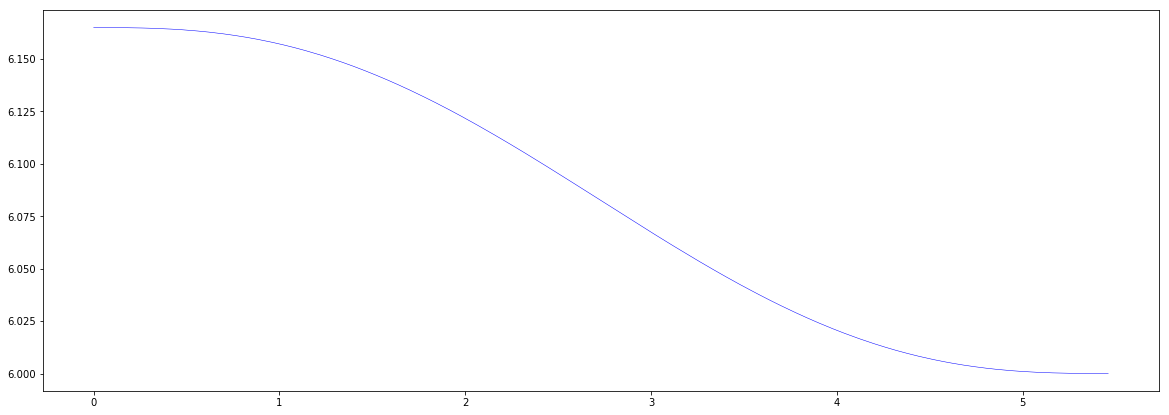

In [7]:
# plot d over t
plt.figure()
plt.plot(traj_df.t,traj_df.d,linewidth=.5,color='b')
plt.show()

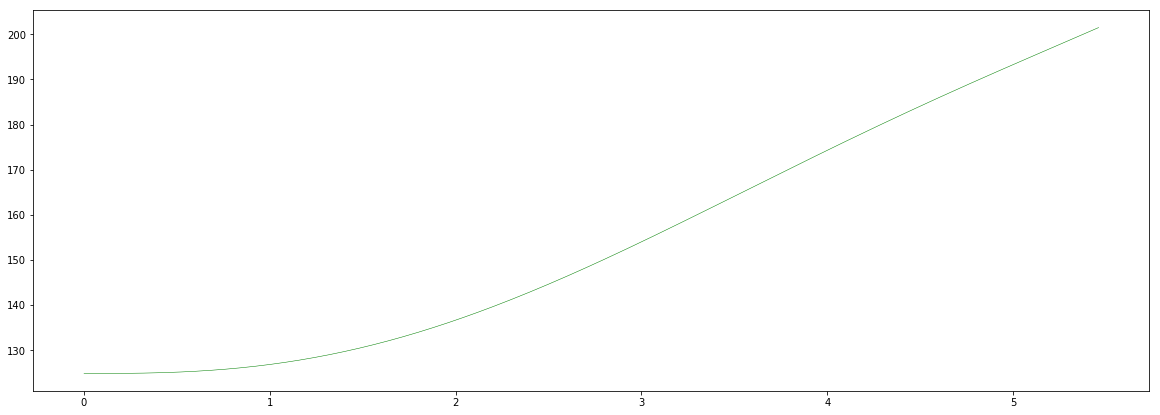

In [8]:
# plot s over t with velocity
plt.figure()
plt.plot(traj_df.t,traj_df.s,linewidth=.5,color='g')
plt.show()

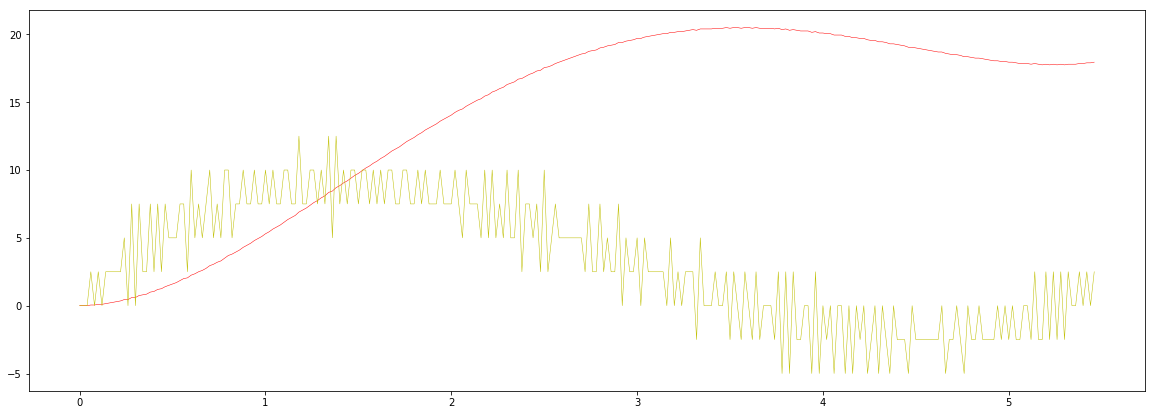

In [9]:
# plot velocity and acceleration over t 
plt.figure()

plt.plot(traj_df.t,traj_df.v,linewidth=.5,color='r')
plt.plot(traj_df.t,traj_df.a,linewidth=.5,color='y')
plt.show()